    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0  

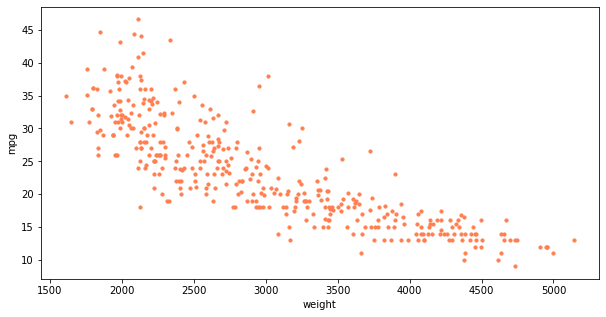

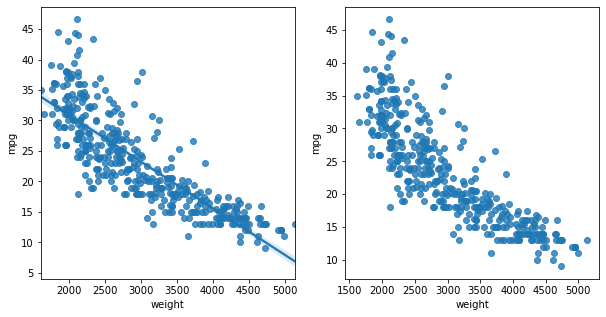

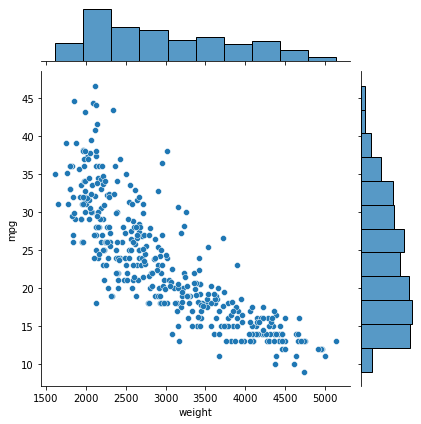

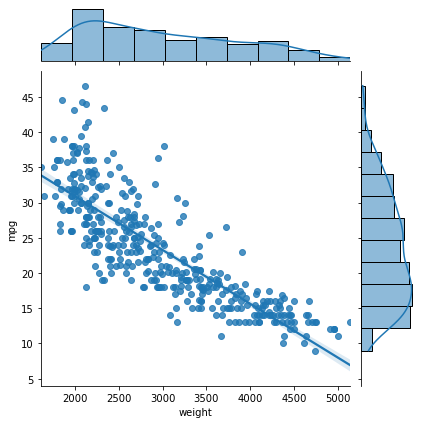

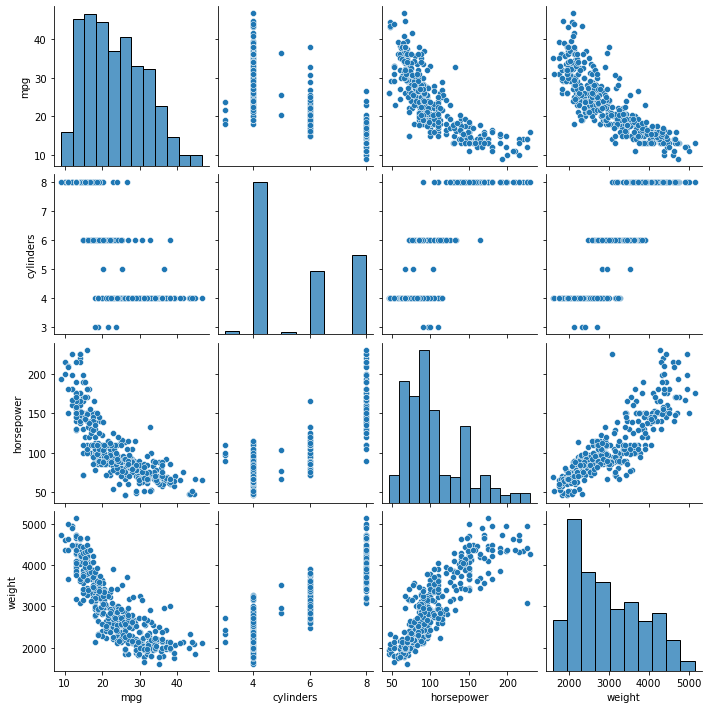

train data 개수:  274
test data 개수:  118
0.6822458558299325


기울기 a:  [-0.00775343]


y절편 b 46.7103662572801




AttributeError: module 'seaborn' has no attribute 'dispplot'

<Figure size 720x360 with 0 Axes>

In [3]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# 데이터 살펴보기
print(df.head())   
print('\n')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 10)
print(df.head())   
print('\n')


'''
[Step 2] 데이터 탐색
'''

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

# horsepower 열의 자료형 변경 (문자열 ->숫자)
print(df['horsepower'].unique())          # horsepower 열의 고유값 확인
print('\n')

df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

print(df.describe())                                     # 데이터 통계 요약정보 확인
print('\n')


'''
[Step 3] 속성(feature 또는 variable) 선택
'''

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())   
print('\n')

### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()

# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)                 # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)  #회귀선 미표시
plt.show()
plt.close()

# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)              # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)  # 회귀선 표시
plt.show()
plt.close()

# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)  
plt.show()
plt.close()


'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']       #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))


'''
Step 5: 단순회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b', lr.intercept_)
print('\n')

# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.dispplot(y, hist=False, label="y")
ax2 = sns.dispplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)


원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


0.708700926297548




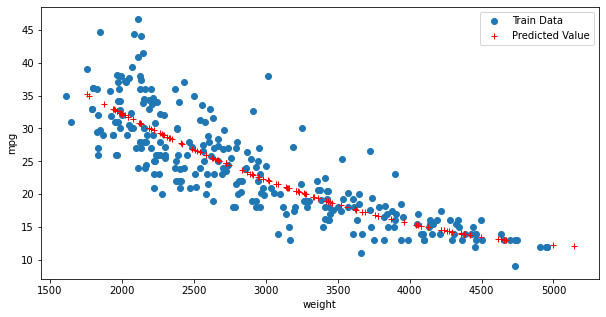

C:\Users\i\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\i\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


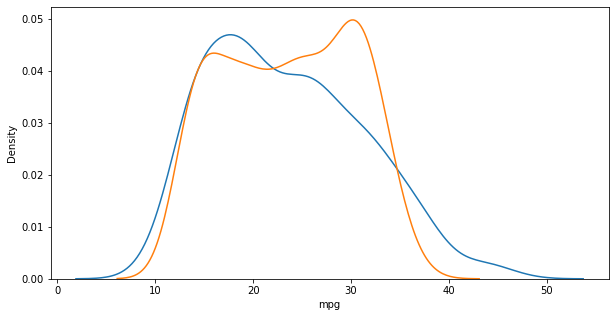

In [4]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1 ~ 4] 데이터 준비 
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   
print('\n')


'''
Step 5: 비선형회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 필요한 모듈 가져오기 
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree=2)               #2차항 적용
X_train_poly=poly.fit_transform(X_train)     #X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  
print('\n')

# train data를 가지고 모형 학습
pr = LinearRegression()   
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)       #X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly,y_test)
print(r_square)
print('\n')

# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()


훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)


0.6939048496695598


X 변수의 계수 a:  [-0.60691288 -0.03714088 -0.00522268]


상수항 b 46.414351269634025




C:\Users\i\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\i\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


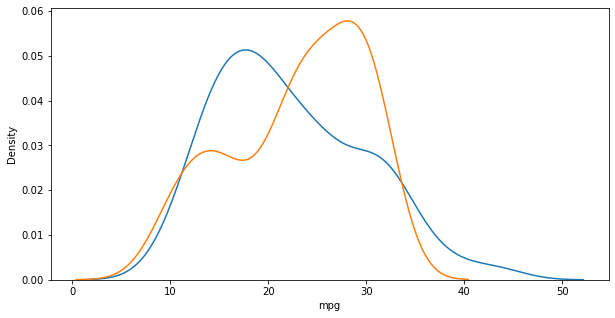

In [5]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1 ~ 3] 데이터 준비 
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]


'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['cylinders', 'horsepower', 'weight']]  #독립 변수 X1, X2, X3
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   
print('\n') 


'''
Step 5: 다중회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

# 회귀식의 기울기
print('X 변수의 계수 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('상수항 b', lr.intercept_)
print('\n')

# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, label="y_test")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()


In [6]:
### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비 - Seaborn에서 제공하는 titanic 데이터셋 가져오기
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

# 데이터 살펴보기
print(df.head())   
print('\n')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)
print(df.head())   
print('\n')


'''
[Step 2] 데이터 탐색
'''

# 데이터 자료형 확인
print(df.info())  
print('\n')

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  
print(rdf.columns.values)
print('\n')

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  
print(len(rdf))
print('\n')

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
print(most_freq)
print('\n')

print(rdf.describe(include='all'))
print('\n')

rdf['embarked'].fillna(most_freq, inplace=True)



'''
[Step 3] 분석에 사용할 속성을 선택
'''

# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
print(ndf.head())   
print('\n')

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
print(ndf.head())   
print('\n')


'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)


'''
[Step 5] KNN 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성 (k=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

# train data를 가지고 모형 학습
knn.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
knn_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(knn_matrix)

# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)            
print(knn_report)

   survived  pclass     sex   age  sibsp  ...  adult_male  deck  embark_town  \
0         0       3    male  22.0      1  ...        True   NaN  Southampton   
1         1       1  female  38.0      1  ...       False     C    Cherbourg   
2         1       3  female  26.0      0  ...       False   NaN  Southampton   
3         1       1  female  35.0      1  ...       False     C  Southampton   
4         0       3    male  35.0      0  ...        True   NaN  Southampton   

  alive  alone  
0    no  False  
1   yes  False  
2   yes   True  
3   yes  False  
4    no   True  

[5 rows x 15 columns]


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0 

In [7]:
### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)


'''
[Step 2] 데이터 탐색/ 전처리
'''

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
rdf['embarked'].fillna(most_freq, inplace=True)


'''
[Step 3] 분석에 사용할 속성을 선택
'''

# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)


'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')


'''
[Step 5] SVM 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 SVM 분류 모형 가져오기
from sklearn import svm

# 모형 객체 생성 (kernel='rbf' 적용)
svm_model = svm.SVC(kernel='rbf')

# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
svm_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(svm_matrix)
print('\n')

# 모형 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)            
print(svm_report)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


[[120   5]
 [ 35  55]]


              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



In [8]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# Breast Cancer 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)

# 열 이름 지정
df.columns = ['id','clump','cell_size','cell_shape', 'adhesion','epithlial',
              'bare_nuclei','chromatin','normal_nucleoli', 'mitoses', 'class'] 

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)


'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

# bare_nuclei 열의 자료형 변경 (문자열 ->숫자)
print(df['bare_nuclei'].unique())                         # bare_nuclei 열의 고유값 확인
print('\n')

df['bare_nuclei'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['bare_nuclei'] = df['bare_nuclei'].astype('int')       # 문자열을 정수형으로 변환

print(df.describe())                                      # 데이터 통계 요약정보 확인
print('\n')


'''
[Step 3] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=df[['clump','cell_size','cell_shape', 'adhesion','epithlial',
      'bare_nuclei','chromatin','normal_nucleoli', 'mitoses']]  #설명 변수 X
y=df['class']                                                   #예측 변수 Y

# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')


'''
[Step 4] Decision Tree 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 Decision Tree 분류 모형 가져오기
from sklearn import tree

# 모형 객체 생성 (criterion='entropy' 적용)
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

# train data를 가지고 모형 학습
tree_model.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = tree_model.predict(X_test)      # 2: benign(양성), 4: malignant(악성)

print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
tree_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(tree_matrix)
print('\n')

# 모형 성능 평가 - 평가지표 계산
tree_report = metrics.classification_report(y_test, y_hat)            
print(tree_report)

        id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0  1000025      5          1           1         1          2           1   
1  1002945      5          4           4         5          7          10   
2  1015425      3          1           1         1          2           2   
3  1016277      6          8           8         1          3           4   
4  1017023      4          1           1         3          2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   cl

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen

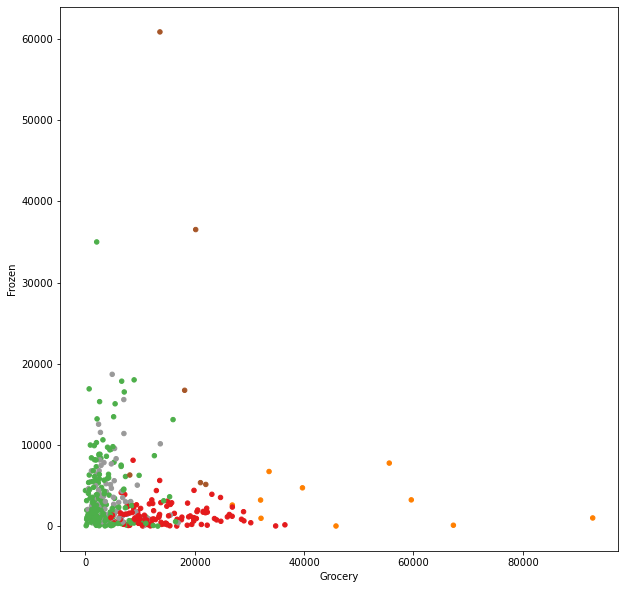

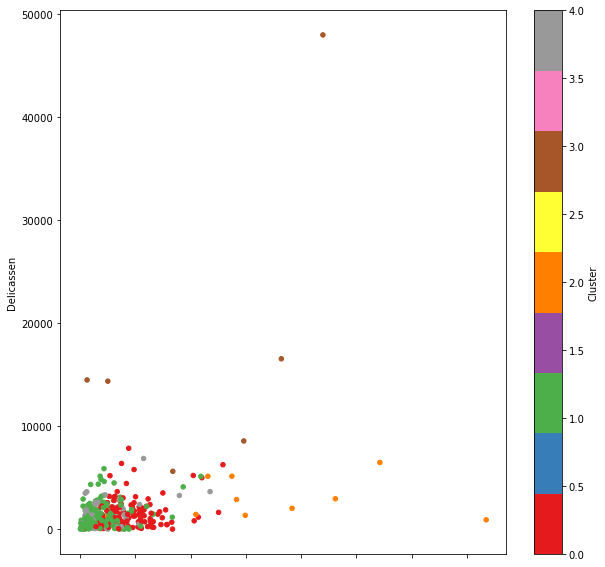

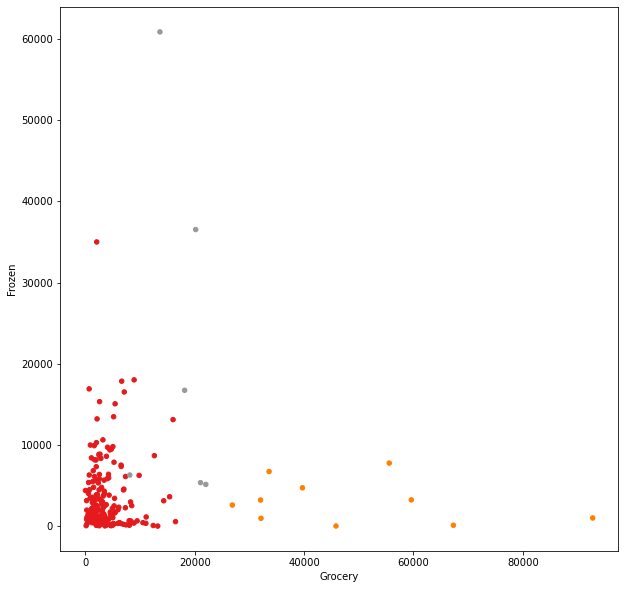

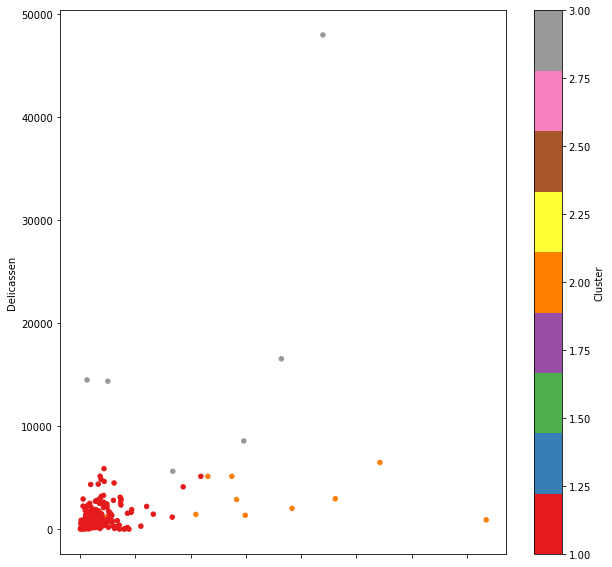

In [9]:
### 기본 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt


'''
[Step 1] 데이터 준비
'''

# Wholesale customers 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)


'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')


'''
[Step 3] 데이터 전처리
'''

# 분석에 사용할 속성을 선택
X = df.iloc[:, :]
print(X[:5])
print('\n')

# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])
print('\n')


'''
[Step 4] k-means 군집 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 모형 객체 생성 
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

# 모형 학습
kmeans.fit(X)   

# 예측 (군집) 
cluster_label = kmeans.labels_   
print(cluster_label)
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())   
print('\n')

# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

# 큰 값으로 구성된 클러스터(0, 4)를 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()
